In [3]:
%pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for cv2


# CC3182 – Visión por Computadora
# Laboratorio 2

Link del respositorio: https://github.com/Czar272/lab2_VxC.git

## Integrantes:
 - Francis Aguilar
 - César Lopez
 - Jose Marchena


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (6,6)


# Task 1

Usted trabaja para una empresa de imágenes satelitales. Una de las cámaras en órbita tiene una
interferencia electrónica que genera un ruido sinusoidal (patrón de rayas diagonales) sobre las fotografías
de la superficie terrestre. Los filtros espaciales tradicionales (Gaussian Blur) destruyen los detalles
geográficos necesarios. Por ello usted ha decido idear una solución tomando como base fotografías que
tiene a mano con el mismo problema previo a implementar la solución real. Con esto en mente, realice:

1. Cargue la imagen periodic_noise.jpg en escala de grises.
2. Calcule la Transformada Discreta de Fourier (DFT) y desplace el componente de frecuencia cero al
centro.
3. Muestre el Espectro de Magnitud en escala logarítmica.
4. Identifique visualmente los "picos" de energía que no corresponden a la información natural de la
imagen (puntos brillantes fuera del centro).
5. Cree una máscara (Notch Filter) que bloquee específicamente esas frecuencias parásitas
(haciéndolas cero), pero preserve el resto del espectro, incluyendo el componente DC.
6. Aplique la Transformada Inversa (IDFT) para recuperar la imagen espacial.

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

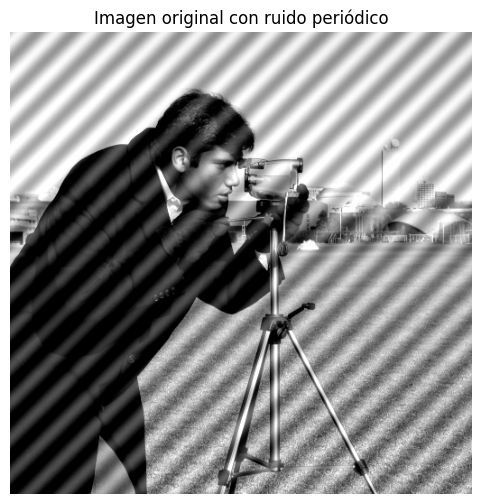

In [5]:
img = cv2.imread('periodic_noise.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title('Imagen original con ruido periódico')
plt.axis('off')


In [6]:
fft = np.fft.fft2(img)
fft_shift = np.fft.fftshift(fft)


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

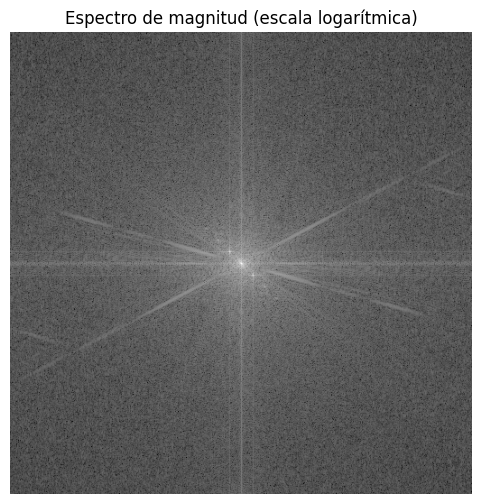

In [7]:
magnitude_spectrum = 20 * np.log(np.abs(fft_shift) + 1)

plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Espectro de magnitud (escala logarítmica)')
plt.axis('off')


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

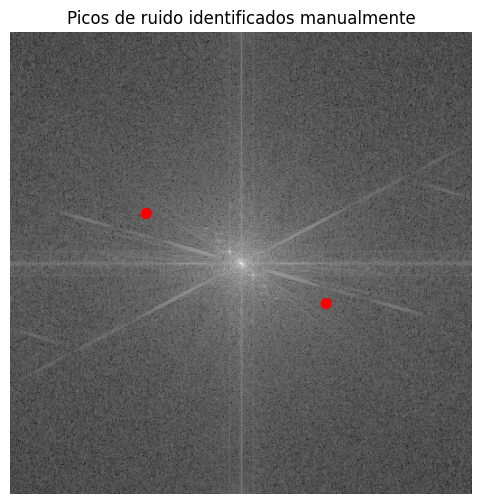

In [8]:
plt.imshow(magnitude_spectrum, cmap='gray')
plt.scatter([150, 350], [200, 300], c='red', s=50)  # coordenadas aproximadas
plt.title('Picos de ruido identificados manualmente')
plt.axis('off')


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

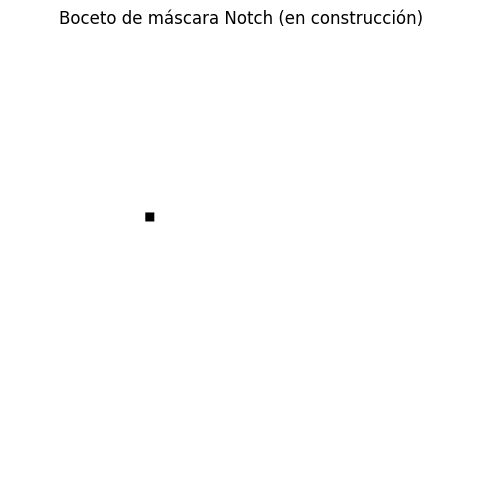

In [ ]:
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

mask = np.ones((rows, cols), np.uint8)

# Coordenadas aproximadas de los picos
offset = 60
size = 6

mask[crow-offset:crow-offset+size, ccol-offset:ccol-offset+size] = 0
mask[crow+offset:crow+offset+size, ccol+offset:ccol+offset+size] = 0

mask[crow-offset:crow-offset+size, ccol+offset:ccol+offset+size] = 0
mask[crow+offset:crow+offset+size, ccol-offset:ccol-offset+size] = 0

plt.imshow(mask, cmap='gray')
plt.title('Máscara Notch Filter')
plt.axis('off')


In [ ]:
filtered_fft = fft_shift * mask

# Inversa
ifft_shift = np.fft.ifftshift(filtered_fft)
img_filtered = np.fft.ifft2(ifft_shift)
img_filtered = np.abs(img_filtered)

plt.imshow(img_filtered, cmap='gray')
plt.title('Imagen reconstruida tras Notch Filter')
plt.axis('off')


# Task 2
Está desarrollando un sistema biométrico de seguridad. El sensor de huellas dactilares está sucio y
produce imágenes binarias con dos tipos de defectos:
1. Pequeños puntos blancos en los valles negros de la huella (Ruido Sal)
2. Las “crestas” de la huella tienen pequeñas roturas que impiden que el algoritmo de matching
funcione (grietas).
Con esto en mente realice:

Con esto en mente realice:
1. Cargue la imagen fingerprint_noisy.png. Asegúrese de que sea binaria.
2. Aplique una operación morfológica para eliminar el ruido blanco sin destruir las crestas de la
huella. (Seleccione entre Erosión, Dilatación, Apertura o Cierre).
3. Aplique una segunda operación secuencial para conectar las grietas en las crestas de la huella.
4. Muestre la imagen original, la imagen tras el paso 2, y la imagen final.

# Task 3

Una fábrica textil necesita detectar rasgaduras en telas de mezclilla (denim) automáticamente. El problema es que la tela tiene una textura natural fuerte (patrón repetitivo) que confunde a los detectores de bordes simples (Canny), detectando el tejido como si fuera un defecto. Por ello se le pide que usted diseñe un pipeline híbrido que combine Fourier y Morfología para aislar solamente la rasgadura. Para ello comienza por probar su solución en una imagen que tiene a mano

Con esto en mente, realice:
1. Utilice Fourier para analizar la textura repetitiva de la tela. Diseñe un filtro que elimine las
frecuencias altas/repetitivas del tejido, dejando una imagen "suavizada" donde solo resalte la
anomalía (la rasgadura) y la iluminación global. (Supresión de Textura)
a. Hint: ¿Qué pasa si eliminamos las frecuencias altas periféricas o específicas?
2. Aplique un umbralizado (thresholding) a la imagen resultante del paso 1 para obtener una máscara
binaria preliminar. (Segmentación)
3. La máscara seguramente tendrá ruido residual. Utilice operaciones morfológicas para limpiar la
máscara y dejar únicamente la silueta de la rasgadura. (Refinamiento)